Loaded data: (545, 13)
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

=== Problem 1a: Numeric features + MinMax (Normalization) ===


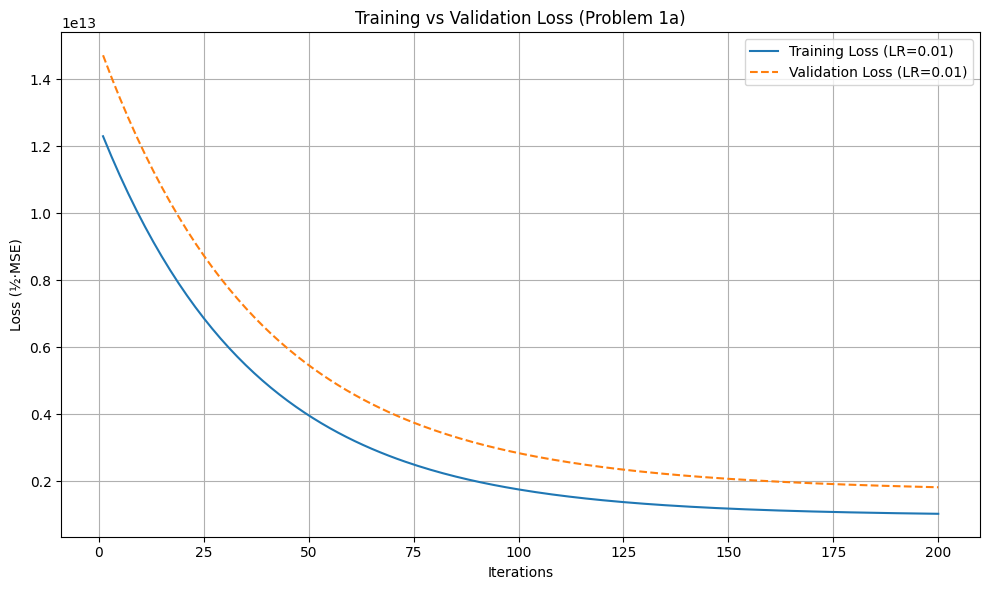


Best Model Parameters (Theta) for Problem 1a:
   intercept: 3,155,745.73
        area: 980,912.65
    bedrooms: 1,345,916.56
   bathrooms: 505,253.23
     stories: 1,060,452.03
     parking: 953,695.76

=== Problem 1b: Numeric + Categorical (One-Hot) + MinMax ===


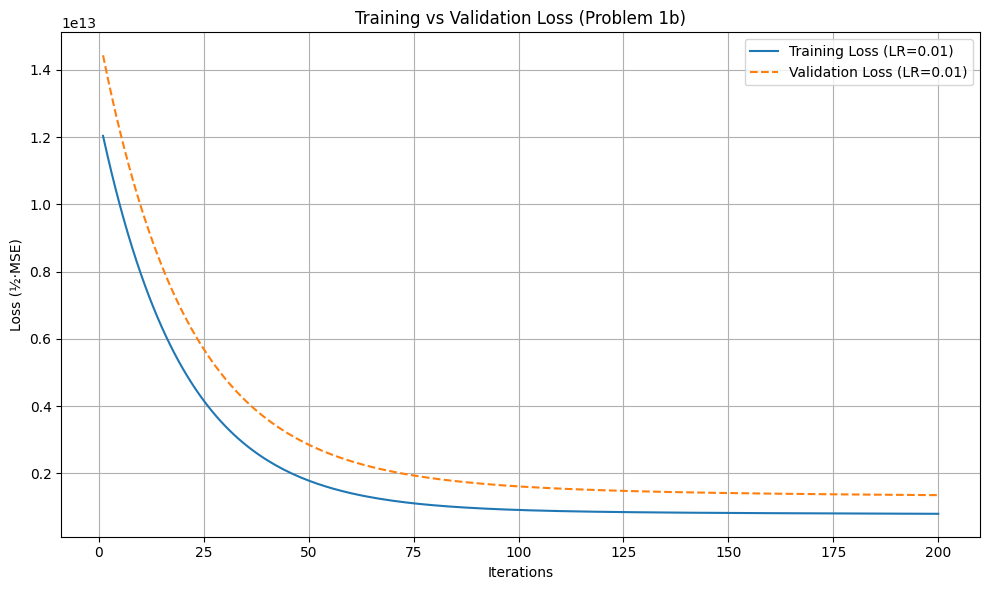


Best Model Parameters (Theta) for Problem 1b:
                intercept: 1,854,917.57
                     area: 606,948.43
                 bedrooms: 828,823.90
                bathrooms: 372,013.42
                  stories: 708,320.76
                  parking: 598,685.95
             mainroad_yes: 1,530,605.65
            guestroom_yes: 391,119.99
             basement_yes: 630,552.37
      hotwaterheating_yes: 161,713.29
      airconditioning_yes: 847,893.87
             prefarea_yes: 525,594.49

=== Problem 2a: Normalization vs Standardization (Numeric Only) ===


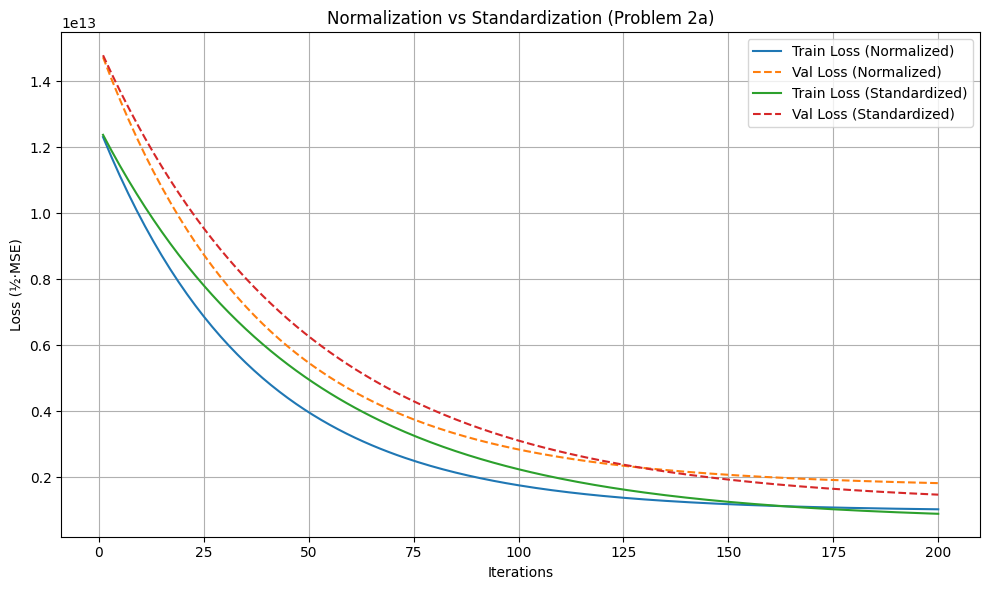


Best Model Parameters (Theta) for Problem 2a - Normalized:
   intercept: 3,155,745.73
        area: 980,912.65
    bedrooms: 1,345,916.56
   bathrooms: 505,253.23
     stories: 1,060,452.03
     parking: 953,695.76

Best Model Parameters (Theta) for Problem 2a - Standardized:
   intercept: 4,099,382.85
        area: 618,841.51
    bedrooms: 220,319.39
   bathrooms: 472,058.63
     stories: 361,026.76
     parking: 310,520.08

=== Problem 2b: Normalization vs Standardization with One-Hot (NO L2) ===
2b — X_all shape: (545, 13), y_all shape: (545, 1)
2b — losses length: norm train=200, norm val=200, std train=200, std val=200
2b — theta sizes: norm=(14, 1), std=(14, 1)


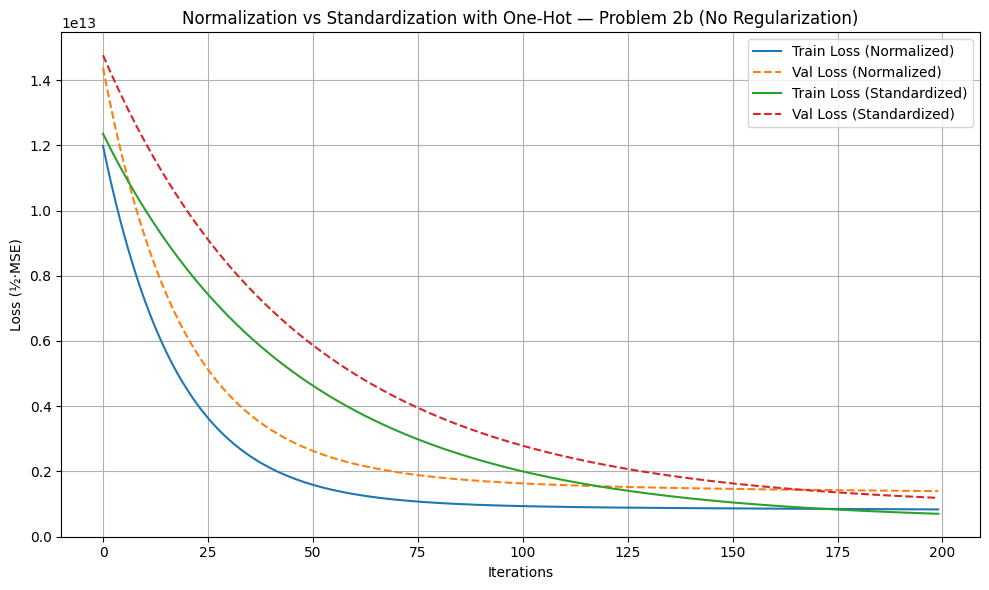


2b — First 10 parameters (Normalized):
intercept: 1,677,817.0533
area: 574,768.5154
bedrooms: 765,466.4023
bathrooms: 362,619.4100
stories: 681,435.0079
parking: 576,384.6504
mainroad_yes: 1,417,622.1971
guestroom_yes: 379,039.3915
basement_yes: 592,032.1675
hotwaterheating_yes: 151,548.3648

2b — First 10 parameters (Standardized):
intercept: 4,092,017.5983
area: 477,602.9441
bedrooms: 164,035.9429
bathrooms: 416,051.7360
stories: 295,948.8100
parking: 217,163.9163
mainroad_yes: 165,535.5830
guestroom_yes: 129,939.3122
basement_yes: 169,846.3333
hotwaterheating_yes: 149,897.4542

=== Problem 3a: L2 Regularization (Normalized Numeric, no bias reg) ===


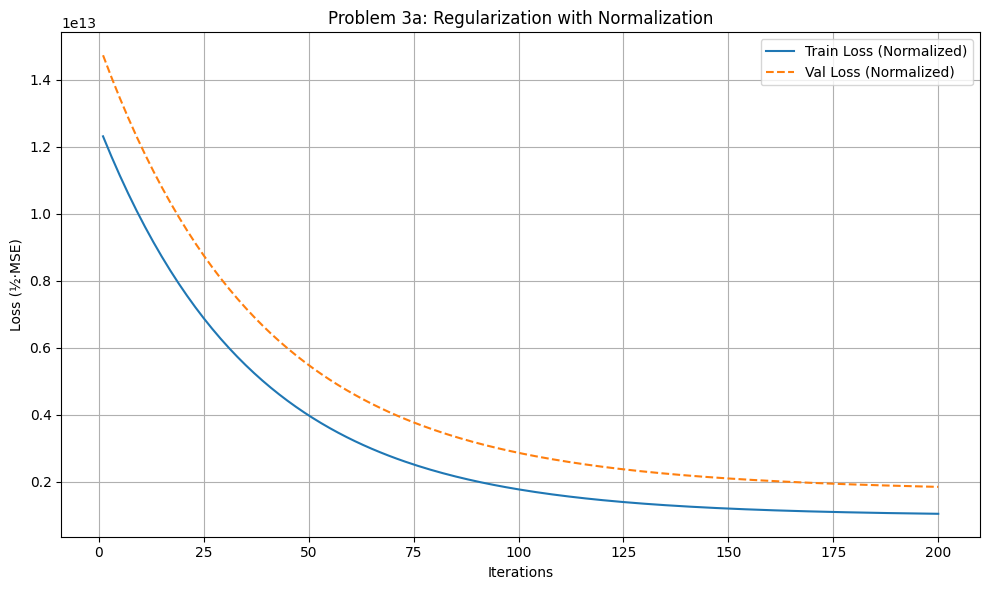


Best Model Parameters (Theta) for Problem 3a - Normalized:
   intercept: 3,172,151.06
        area: 956,157.77
    bedrooms: 1,311,108.59
   bathrooms: 493,362.02
     stories: 1,034,646.97
     parking: 930,508.94

=== Problem 3b: L2 Regularization with One-Hot (Normalized, all weights reg) ===
3b — X shape: (545, 13), y shape: (545, 1)
3b — one-hot columns: 8
3b — losses length: train=200, val=200
3b — theta shape: (13, 1)


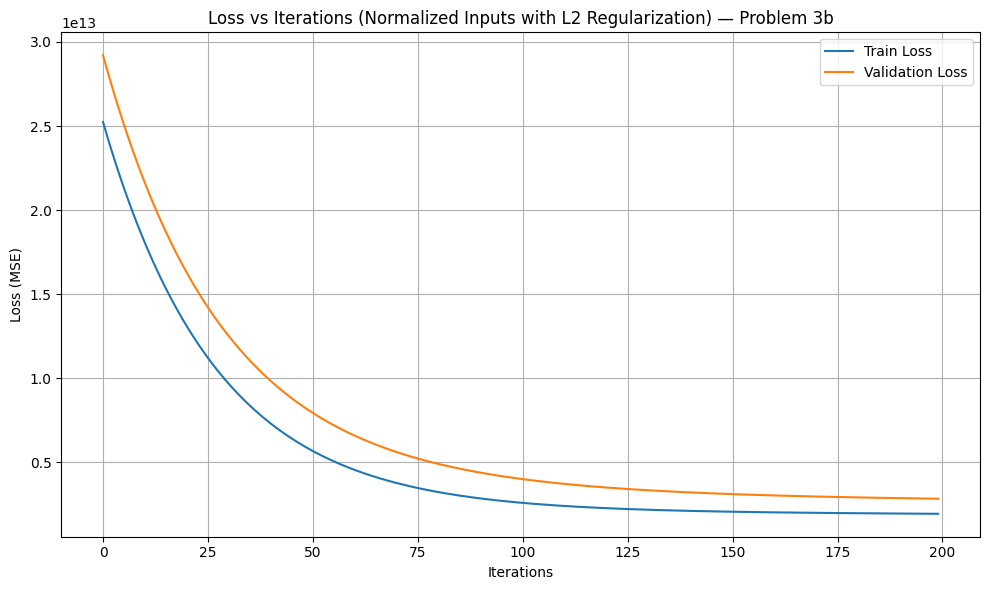


First 10 parameters for 3b:
area: 789,296.1578
bedrooms: 1,143,179.2574
bathrooms: 432,364.2959
stories: 907,755.9079
parking: 760,640.1756
mainroad_yes: 2,166,088.0766
guestroom_yes: 486,686.2905
basement_yes: 854,017.9873
hotwaterheating_yes: 205,525.4604
airconditioning_yes: 1,045,329.8671
... total params: 13


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv("Housing.csv")
print("Loaded data:", df.shape)
print(df.head())

def add_intercept(X):
    """Append a column of ones for the intercept term."""
    return np.hstack([np.ones((X.shape[0], 1)), X])

def initialize_theta(n):
    """Zero initialization."""
    return np.zeros((n, 1))

def predict(X, theta):
    return X @ theta

def half_mse(X, y, theta):
    """½·MSE (matches common GD convention)."""
    m = len(y)
    return (1 / (2 * m)) * np.sum((predict(X, theta) - y) ** 2)

def gradient_descent(X, y, theta, lr, iterations):
    """Vanilla GD (no regularization). Tracks training loss each step."""
    m = len(y)
    loss_history = []
    for _ in range(iterations):
        error = predict(X, theta) - y
        gradient = (1 / m) * (X.T @ error)
        theta -= lr * gradient
        loss_history.append(half_mse(X, y, theta))
    return theta, loss_history

def gradient_descent_l2_with_bias(X_b, y, theta, lr, iterations, lambda_):
    """
    L2-regularized GD where X_b already includes the bias column as the first column.
    We do NOT regularize the bias term (theta[0]).
    """
    m = len(y)
    loss_history = []
    for _ in range(iterations):
        error = predict(X_b, theta) - y
        reg_term = lambda_ * np.vstack([[0.0], theta[1:]])  # skip intercept
        gradient = (1 / m) * (X_b.T @ error + reg_term)
        theta -= lr * gradient
        loss_history.append(half_mse(X_b, y, theta))
    return theta, loss_history

def l2_plain_no_biascol(X, y, X_val, y_val, lr=0.01, iterations=200, lambda_reg=0.1):
    """
    L2-regularized GD on X WITHOUT an explicit intercept column
    (i.e., regularizes all weights). Tracks train/val MSE (not 1/2·MSE).
    """
    m, n = X.shape
    theta = np.zeros((n, 1))
    train_losses, val_losses = [], []
    for _ in range(iterations):
        y_pred = X @ theta
        error = y_pred - y
        gradient = (X.T @ error + lambda_reg * theta) / m
        theta -= lr * gradient
        train_loss = np.mean((y_pred - y) ** 2)
        val_loss   = np.mean((X_val @ theta - y_val) ** 2)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
    return theta, train_losses, val_losses


# Problem 1a — Numeric features + MinMax (Normalization)

print("\n=== Problem 1a: Numeric features + MinMax (Normalization) ===")
features_1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = df[features_1a].values
y = df[target].values.reshape(-1, 1)

# Normalize numeric features
scaler_1a = MinMaxScaler()
X_scaled = scaler_1a.fit_transform(X)

# Train/Val split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Add intercept column
X_train_b = add_intercept(X_train)
X_val_b   = add_intercept(X_val)

learning_rate = 0.01
iterations = 200

theta_init = initialize_theta(X_train_b.shape[1])
theta_final_1a, train_loss_1a = gradient_descent(
    X_train_b, y_train, theta_init.copy(), learning_rate, iterations
)

# Build validation loss curve across iterations
val_loss_1a = []
theta_tmp = theta_init.copy()
for _ in range(iterations):
    theta_tmp, _ = gradient_descent(X_train_b, y_train, theta_tmp, learning_rate, 1)
    val_loss_1a.append(half_mse(X_val_b, y_val, theta_tmp))

plt.figure(figsize=(10,6))
plt.plot(range(1, iterations+1), train_loss_1a, label="Training Loss (LR=0.01)")
plt.plot(range(1, iterations+1), val_loss_1a, linestyle='--', label="Validation Loss (LR=0.01)")
plt.xlabel("Iterations"); plt.ylabel("Loss (½·MSE)")
plt.title("Training vs Validation Loss (Problem 1a)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

print("\nBest Model Parameters (Theta) for Problem 1a:")
for label, value in zip(['intercept'] + features_1a, theta_final_1a.flatten()):
    print(f"{label:>12}: {value:,.2f}")

# Problem 1b — Numeric + Categorical (One-Hot) + MinMax

print("\n=== Problem 1b: Numeric + Categorical (One-Hot) + MinMax ===")
selected_features_1b = [
    'area', 'bedrooms', 'bathrooms', 'stories',
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'parking', 'prefarea'
]

df_b = df[selected_features_1b + ['price']].copy()
categorical_cols = ['mainroad', 'guestroom', 'basement',
                    'hotwaterheating', 'airconditioning', 'prefarea']

# One-hot encode categoricals
df_b = pd.get_dummies(df_b, columns=categorical_cols, drop_first=True)

features_b = [c for c in df_b.columns if c != 'price']
X_b = df_b[features_b].values
y_b = df_b['price'].values.reshape(-1, 1)

scaler_1b = MinMaxScaler()
X_b_scaled = scaler_1b.fit_transform(X_b)

X_train_b2, X_val_b2, y_train_b2, y_val_b2 = train_test_split(
    X_b_scaled, y_b, test_size=0.2, random_state=42
)

# Add intercept
X_train_b2 = add_intercept(X_train_b2)
X_val_b2   = add_intercept(X_val_b2)

theta_init_b = initialize_theta(X_train_b2.shape[1])
theta_final_1b, train_loss_1b = gradient_descent(
    X_train_b2, y_train_b2, theta_init_b.copy(), learning_rate, iterations
)

# Validation loss across iterations
val_loss_1b = []
theta_tmp = theta_init_b.copy()
for _ in range(iterations):
    theta_tmp, _ = gradient_descent(X_train_b2, y_train_b2, theta_tmp, learning_rate, 1)
    val_loss_1b.append(half_mse(X_val_b2, y_val_b2, theta_tmp))

plt.figure(figsize=(10,6))
plt.plot(range(1, iterations+1), train_loss_1b, label="Training Loss (LR=0.01)")
plt.plot(range(1, iterations+1), val_loss_1b, linestyle='--', label="Validation Loss (LR=0.01)")
plt.xlabel("Iterations"); plt.ylabel("Loss (½·MSE)")
plt.title("Training vs Validation Loss (Problem 1b)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

print("\nBest Model Parameters (Theta) for Problem 1b:")
for label, value in zip(['intercept'] + features_b, theta_final_1b.flatten()):
    print(f"{label:>25}: {value:,.2f}")

# Problem 2a — Normalize vs Standardize (numeric only)

print("\n=== Problem 2a: Normalization vs Standardization (Numeric Only) ===")
features_2a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df[features_2a].values
y = df['price'].values.reshape(-1, 1)

X_norm = MinMaxScaler().fit_transform(X)
X_std  = StandardScaler().fit_transform(X)

Xn_train, Xn_val, yn_train, yn_val = train_test_split(X_norm, y, test_size=0.2, random_state=42)
Xs_train, Xs_val, ys_train, ys_val = train_test_split(X_std,  y, test_size=0.2, random_state=42)

Xn_train_b = add_intercept(Xn_train); Xn_val_b = add_intercept(Xn_val)
Xs_train_b = add_intercept(Xs_train); Xs_val_b = add_intercept(Xs_val)

theta_n = initialize_theta(Xn_train_b.shape[1])
theta_n_final, loss_n_train = gradient_descent(
    Xn_train_b, yn_train, theta_n.copy(), learning_rate, iterations
)

# Build validation curve progressively
loss_n_val = []
theta_tmp = theta_n.copy()
for _ in range(iterations):
    theta_tmp, _ = gradient_descent(Xn_train_b, yn_train, theta_tmp, learning_rate, 1)
    loss_n_val.append(half_mse(Xn_val_b, yn_val, theta_tmp))

theta_s = initialize_theta(Xs_train_b.shape[1])
theta_s_final, loss_s_train = gradient_descent(
    Xs_train_b, ys_train, theta_s.copy(), learning_rate, iterations
)

loss_s_val = []
theta_tmp = theta_s.copy()
for _ in range(iterations):
    theta_tmp, _ = gradient_descent(Xs_train_b, ys_train, theta_tmp, learning_rate, 1)
    loss_s_val.append(half_mse(Xs_val_b, ys_val, theta_tmp))

plt.figure(figsize=(10,6))
plt.plot(range(1, iterations+1), loss_n_train, label="Train Loss (Normalized)")
plt.plot(range(1, iterations+1), loss_n_val, linestyle='--', label="Val Loss (Normalized)")
plt.plot(range(1, iterations+1), loss_s_train, label="Train Loss (Standardized)")
plt.plot(range(1, iterations+1), loss_s_val, linestyle='--', label="Val Loss (Standardized)")
plt.xlabel("Iterations"); plt.ylabel("Loss (½·MSE)")
plt.title("Normalization vs Standardization (Problem 2a)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

print("\nBest Model Parameters (Theta) for Problem 2a - Normalized:")
for label, value in zip(['intercept'] + features_2a, theta_n_final.flatten()):
    print(f"{label:>12}: {value:,.2f}")

print("\nBest Model Parameters (Theta) for Problem 2a - Standardized:")
for label, value in zip(['intercept'] + features_2a, theta_s_final.flatten()):
    print(f"{label:>12}: {value:,.2f}")

# Problem 2b: Normalization vs Standardization with One-Hot

print("\n=== Problem 2b: Normalization vs Standardization with One-Hot (NO L2) ===")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

categorical = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea',
    'furnishingstatus'
]
df_b2 = pd.get_dummies(df.copy(), columns=categorical, drop_first=True)

target_col = 'price'
features_all = [c for c in df_b2.columns if c != target_col]

if target_col not in df_b2.columns:
    raise ValueError("Target column 'price' not found after encoding.")
if len(features_all) == 0:
    raise ValueError("No features found for Problem 2b.")

X_all = df_b2[features_all].values
y_all = df_b2[target_col].values.reshape(-1, 1)

print(f"2b — X_all shape: {X_all.shape}, y_all shape: {y_all.shape}")
non_numeric_left = df_b2[features_all].select_dtypes(include=['object', 'category']).columns.tolist()
if non_numeric_left:
    print("WARNING: Non-numeric columns still present:", non_numeric_left)

# normalized and standardized versions
X_norm_all = MinMaxScaler().fit_transform(X_all)
X_std_all  = StandardScaler().fit_transform(X_all)

Xn_train, Xn_val, yn_train, yn_val = train_test_split(
    X_norm_all, y_all, test_size=0.2, random_state=42
)
Xs_train, Xs_val, ys_train, ys_val = train_test_split(
    X_std_all,  y_all, test_size=0.2, random_state=42
)

# intercept column
def add_intercept(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

Xn_train_b = add_intercept(Xn_train); Xn_val_b = add_intercept(Xn_val)
Xs_train_b = add_intercept(Xs_train); Xs_val_b = add_intercept(Xs_val)


def predict(X, theta):
    return X @ theta

def half_mse(X, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((predict(X, theta) - y) ** 2)

def gd_no_reg_get_val_curve(X_train_b, y_train, X_val_b, y_val, lr=0.01, iterations=200):
    theta = np.zeros((X_train_b.shape[1], 1))
    train_loss, val_loss = [], []
    for _ in range(iterations):
        # one step of GD
        err = predict(X_train_b, theta) - y_train
        grad = (X_train_b.T @ err) / len(y_train)
        theta -= lr * grad
        # record losses
        train_loss.append(half_mse(X_train_b, y_train, theta))
        val_loss.append(half_mse(X_val_b, y_val, theta))
    return theta, train_loss, val_loss

LR = 0.01
ITERS = 200

# Train on Normalized
theta_norm, train_loss_norm, val_loss_norm = gd_no_reg_get_val_curve(
    Xn_train_b, yn_train, Xn_val_b, yn_val, lr=LR, iterations=ITERS
)

# Train on Standardized
theta_std, train_loss_std, val_loss_std = gd_no_reg_get_val_curve(
    Xs_train_b, ys_train, Xs_val_b, ys_val, lr=LR, iterations=ITERS
)

print(f"2b — losses length: norm train={len(train_loss_norm)}, norm val={len(val_loss_norm)}, "
      f"std train={len(train_loss_std)}, std val={len(val_loss_std)}")
print(f"2b — theta sizes: norm={theta_norm.shape}, std={theta_std.shape}")

# Plot
plt.figure(figsize=(10,6))
plt.plot(train_loss_norm, label='Train Loss (Normalized)')
plt.plot(val_loss_norm,   label='Val Loss (Normalized)', linestyle='--')
plt.plot(train_loss_std,  label='Train Loss (Standardized)')
plt.plot(val_loss_std,    label='Val Loss (Standardized)', linestyle='--')
plt.xlabel('Iterations'); plt.ylabel('Loss (½·MSE)')
plt.title('Normalization vs Standardization with One-Hot — Problem 2b (No Regularization)')
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

print("\n2b — First 10 parameters (Normalized):")
for feat, val in list(zip(['intercept'] + features_all, theta_norm.flatten()))[:10]:
    print(f"{feat}: {val:,.4f}")

print("\n2b — First 10 parameters (Standardized):")
for feat, val in list(zip(['intercept'] + features_all, theta_std.flatten()))[:10]:
    print(f"{feat}: {val:,.4f}")



# Problem 3a — L2 regularization (normalized numeric, skip bias reg)

print("\n=== Problem 3a: L2 Regularization (Normalized Numeric, no bias reg) ===")
features_3a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df[features_3a].values
y = df['price'].values.reshape(-1, 1)

X_norm = MinMaxScaler().fit_transform(X)

Xn_train, Xn_val, yn_train, yn_val = train_test_split(X_norm, y, test_size=0.2, random_state=42)
Xn_train_b = add_intercept(Xn_train)
Xn_val_b   = add_intercept(Xn_val)

learning_rate = 0.01
iterations = 200
lambda_reg = 10.0

theta_init_3a = initialize_theta(Xn_train_b.shape[1])
theta_n_l2_final, loss_n_l2_train = gradient_descent_l2_with_bias(
    Xn_train_b, yn_train, theta_init_3a.copy(), learning_rate, iterations, lambda_reg
)

# Validation losses across iterations
loss_n_l2_val = []
theta_tmp = theta_init_3a.copy()
for _ in range(iterations):
    theta_tmp, _ = gradient_descent_l2_with_bias(
        Xn_train_b, yn_train, theta_tmp, learning_rate, 1, lambda_reg
    )
    loss_n_l2_val.append(half_mse(Xn_val_b, yn_val, theta_tmp))

plt.figure(figsize=(10,6))
plt.plot(range(1, iterations+1), loss_n_l2_train, label="Train Loss (Normalized)")
plt.plot(range(1, iterations+1), loss_n_l2_val, linestyle='--', label="Val Loss (Normalized)")
plt.xlabel("Iterations"); plt.ylabel("Loss (½·MSE)")
plt.title("Problem 3a: Regularization with Normalization")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

print("\nBest Model Parameters (Theta) for Problem 3a - Normalized:")
print(f"{'intercept':>12}: {theta_n_l2_final[0,0]:,.2f}")
for i, f in enumerate(features_3a):
    print(f"{f:>12}: {theta_n_l2_final[i+1,0]:,.2f}")

# Problem 3b: L2 Regularization with One-Hot (Normalized, all weights reg)
print("\n=== Problem 3b: L2 Regularization with One-Hot (Normalized, all weights reg) ===")

categorical = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea',
    'furnishingstatus'  # <-- added in Option A
]
df_encoded = pd.get_dummies(df.copy(), columns=categorical, drop_first=True)

base_num = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
one_hot_cols = [c for c in df_encoded.columns if any(c.startswith(cat + '_') for cat in categorical)]
features_3b = base_num + one_hot_cols

missing = [c for c in base_num if c not in df_encoded.columns]
if missing:
    raise ValueError(f"Missing expected numeric columns: {missing}")

if not one_hot_cols:
    print("Warning: no one-hot columns detected from categoricals. Check the categorical list / column names.")

X = df_encoded[features_3b].values
y = df_encoded['price'].values.reshape(-1, 1)

print(f"3b — X shape: {X.shape}, y shape: {y.shape}")
print(f"3b — one-hot columns: {len(one_hot_cols)}")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_3b = MinMaxScaler()
X_train_scaled = scaler_3b.fit_transform(X_train)
X_val_scaled   = scaler_3b.transform(X_val)

def l2_plain_no_biascol(X, y, X_val, y_val, lr=0.01, iterations=200, lambda_reg=0.1):
    m, n = X.shape
    theta = np.zeros((n, 1))
    train_losses, val_losses = [], []
    for _ in range(iterations):
        y_pred = X @ theta
        error = y_pred - y
        gradient = (X.T @ error + lambda_reg * theta) / m
        theta -= lr * gradient
        train_loss = np.mean((y_pred - y) ** 2)
        val_loss   = np.mean((X_val @ theta - y_val) ** 2)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
    return theta, train_losses, val_losses

theta_3b, train_loss_3b, val_loss_3b = l2_plain_no_biascol(
    X_train_scaled, y_train, X_val_scaled, y_val,
    lr=0.01, iterations=200, lambda_reg=0.1
)

print(f"3b — losses length: train={len(train_loss_3b)}, val={len(val_loss_3b)}")
print(f"3b — theta shape: {theta_3b.shape}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(train_loss_3b, label='Train Loss')
plt.plot(val_loss_3b, label='Validation Loss')
plt.xlabel('Iterations'); plt.ylabel('Loss (MSE)')
plt.title('Loss vs Iterations (Normalized Inputs with L2 Regularization) — Problem 3b')
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

print("\nFirst 10 parameters for 3b:")
for feat, val in list(zip(features_3b, theta_3b.flatten()))[:10]:
    print(f"{feat}: {val:,.4f}")
print(f"... total params: {len(features_3b)}")
